# Tabular Playground Series
## 1. Problem Definition
The original dataset deals with predicting the category on an eCommerce product given various attributes about the listing. 
Although the features are anonymized, they have properties relating to real-world features.

## 2. Data
This dataset is taken from kaggle:

https://www.kaggle.com/competitions/tabular-playground-series-jun-2021/overview/evaluation

## 3. Evaluation 
Desired Format is:
id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
* 200000,0.05,0.14,0.21,0.05,0.20,0.04,0.00,0.20,0.11
* 200001,0.21,0.06,0.10,0.20,0.13,0.01,0.04,0.10,0.15
* 200002,0.15,0.12,0.18,0.10,0.16,0.16,0.03,0.01,0.09
* etc.

## 4. Features



## 5. Modelling
1. Neural Network
2. Will get help from https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [1]:
# Load some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
# Load the data
df=pd.read_csv('drive/MyDrive/Tabular Playground Series/tabular-playground-series-jun-2021.zip (Unzipped Files)/train.csv')
df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 77 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          200000 non-null  int64 
 1   feature_0   200000 non-null  int64 
 2   feature_1   200000 non-null  int64 
 3   feature_2   200000 non-null  int64 
 4   feature_3   200000 non-null  int64 
 5   feature_4   200000 non-null  int64 
 6   feature_5   200000 non-null  int64 
 7   feature_6   200000 non-null  int64 
 8   feature_7   200000 non-null  int64 
 9   feature_8   200000 non-null  int64 
 10  feature_9   200000 non-null  int64 
 11  feature_10  200000 non-null  int64 
 12  feature_11  200000 non-null  int64 
 13  feature_12  200000 non-null  int64 
 14  feature_13  200000 non-null  int64 
 15  feature_14  200000 non-null  int64 
 16  feature_15  200000 non-null  int64 
 17  feature_16  200000 non-null  int64 
 18  feature_17  200000 non-null  int64 
 19  feature_18  200000 non-

In [46]:
df.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,99999.500000,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,...,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,57735.171256,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,...,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,49999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,99999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,149999.250000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,...,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,199999.000000,61.000000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.00000,...,54.000000,24.000000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.00000,52.000000


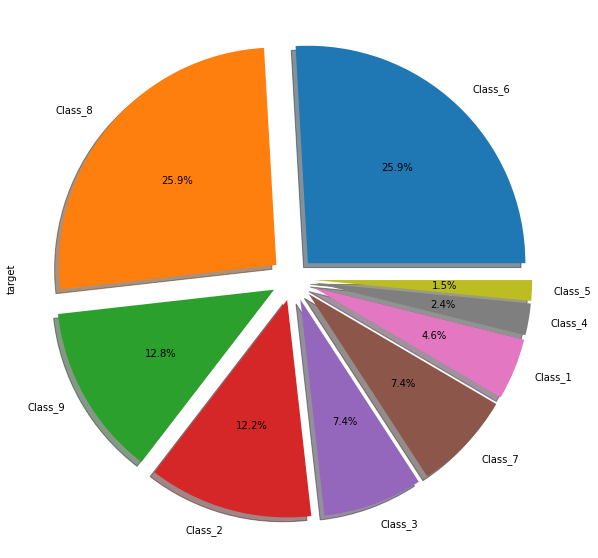

In [47]:
plt.figure(figsize=(10,10))
df['target'].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [48]:
df.drop('id',axis=1,inplace=True)

In [49]:
unique_labels=df['target'].unique()

In [50]:

df.isna().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
             ..
feature_71    0
feature_72    0
feature_73    0
feature_74    0
target        0
Length: 76, dtype: int64

In [51]:
#Lets make x,y
x=df.drop('target',axis=1)
y=df['target']

In [52]:
boolean_labels=[unique_labels==y1 for y1 in y]

In [53]:
boolean_labels[4]

array([False,  True, False, False, False, False, False, False, False])

### Lets Split

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,boolean_labels,test_size=0.2,random_state=42)

In [55]:
import tensorflow as tf

In [56]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_train_trans=scalar.fit_transform(x_train)
x_train_trans=tf.convert_to_tensor(x_train_trans,tf.float32)
y_train_trans=np.array(y_train)

**Lets build neural network**

In [57]:
x_train_trans

<tf.Tensor: shape=(160000, 75), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , ..., 0.03278688, 0.        ,
        0.        ],
       [0.04918033, 0.        , 0.015625  , ..., 0.01639344, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1147541 , 0.04615385,
        0.11538462],
       ...,
       [0.        , 0.01960784, 0.03125   , ..., 0.06557377, 0.04615385,
        0.        ],
       [0.01639344, 0.        , 0.03125   , ..., 0.        , 0.00769231,
        0.        ],
       [0.        , 0.03921569, 0.015625  , ..., 0.        , 0.3846154 ,
        0.75      ]], dtype=float32)>

In [58]:
len(y_train_trans)

160000

In [59]:
len(unique_labels)

9

In [60]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(45,input_shape=(75,),activation='relu'),
                           tf.keras.layers.Dense(35,activation='relu'),
                           tf.keras.layers.Dense(9,activation='softmax')
])
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train_trans,y_train_trans,epochs=10)

Epoch 1/10
5000/5000 [==============================] - 21s 4ms/step - loss: 1.8061 - accuracy: 0.3389
Epoch 2/10
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7761 - accuracy: 0.3505
Epoch 3/10
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7689 - accuracy: 0.3527
Epoch 4/10
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7651 - accuracy: 0.3540
Epoch 5/10
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7616 - accuracy: 0.3557
Epoch 6/10
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7593 - accuracy: 0.3570
Epoch 7/10
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7570 - accuracy: 0.3573
Epoch 8/10
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7553 - accuracy: 0.3589
Epoch 9/10
5000/5000 [==============================] - 10s 2ms/step - loss: 1.7535 - accuracy: 0.3593
Epoch 10/10
5000/5000 [==============================] - 10s 2ms/step - loss: 1.

In [ ]:
x_val_trans=scalar.fit_transform(x_val)
x_val_trans=tf.convert_to_tensor(x_val_trans,tf.float32)
y_val_trans=np.array(y_val)

In [ ]:
model.evaluate(x_val_trans,y_val_trans)

In [ ]:
model_accuracies={}
model_accuracies['Neural']=model.evaluate(x_val_trans,y_val_trans)

In [42]:
from sklearn.linear_model import SGDClassifier
np.random.seed(42)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd.score(x_val,y_val)


0.249575

In [43]:
from sklearn.kernel_approximation import RBFSampler
np.random.seed(42)
from sklearn.linear_model import SGDClassifier
rbf_feature = RBFSampler(gamma=1, random_state=1)
x_train_trans = rbf_feature.fit_transform(x_train)
clf = SGDClassifier(max_iter=5)
clf.fit(x_train_trans, y_train)
SGDClassifier(max_iter=5)
clf.score(x_train_trans, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


0.1816375

In [44]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
r_model=RandomForestClassifier()
r_model.fit(x_train,y_train);

In [45]:
np.random.seed(42)
r_model.score(x_val,y_val)

0.3528

In [46]:
import xgboost as xgb

original_model = xgb.XGBClassifier()

In [47]:
original_model.fit(x_train[:10000],y_train[:10000])

XGBClassifier(objective='multi:softprob')

In [48]:
original_model.score(x_val,y_val)

0.357575

In [63]:
test=pd.read_csv('drive/MyDrive/Tabular Playground Series/tabular-playground-series-jun-2021.zip (Unzipped Files)/test.csv')
test.head(10)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,...,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,200005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
6,200006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,2,2,1,0,0
7,200007,2,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,200008,0,0,1,2,0,0,0,0,0,...,0,3,0,0,5,0,0,1,3,0
9,200009,0,1,0,3,0,1,1,18,2,...,2,1,62,1,0,2,1,0,22,0


In [65]:
test_use=test.drop(['id'],axis=1)
pred=r_model.predict(test_use)

In [66]:
pred[:10]

array(['Class_2', 'Class_6', 'Class_6', 'Class_6', 'Class_8', 'Class_6',
       'Class_8', 'Class_2', 'Class_8', 'Class_8'], dtype=object)

In [72]:
pred_prob=r_model.predict_proba(test_use)


In [81]:
submission_df = pd.DataFrame()

submission_df["id"] = test["id"]

for i in range(9):
    probabilities = pred_prob[:,i]
    submission_df[f"Class_{i + 1}"] = probabilities

In [82]:
submission_df.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.07,0.42,0.188333,0.00,0.01,0.20,0.01,0.02,0.081667
1,200001,0.08,0.15,0.070000,0.02,0.00,0.23,0.11,0.22,0.120000
2,200002,0.01,0.06,0.020000,0.01,0.01,0.54,0.03,0.23,0.090000
3,200003,0.03,0.11,0.100000,0.08,0.00,0.25,0.05,0.15,0.230000
4,200004,0.07,0.14,0.100000,0.00,0.03,0.19,0.10,0.24,0.130000


In [83]:
submission_df.to_csv('drive/MyDrive/Tabular Playground Series/tabular-playground-series-jun-2021.zip (Unzipped Files)/mysub.csv')

In [2]:
j=pd.read_csv('mysub.csv')

In [3]:
j.head()

,Unnamed: 0,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0,200000,0.07,0.42,0.188333,0.00,0.01,0.20,0.01,0.02,0.081667
1,1,200001,0.08,0.15,0.070000,0.02,0.00,0.23,0.11,0.22,0.120000
2,2,200002,0.01,0.06,0.020000,0.01,0.01,0.54,0.03,0.23,0.090000
3,3,200003,0.03,0.11,0.100000,0.08,0.00,0.25,0.05,0.15,0.230000
4,4,200004,0.07,0.14,0.100000,0.00,0.03,0.19,0.10,0.24,0.130000


In [4]:
j.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
j.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.07,0.42,0.188333,0.00,0.01,0.20,0.01,0.02,0.081667
1,200001,0.08,0.15,0.070000,0.02,0.00,0.23,0.11,0.22,0.120000
2,200002,0.01,0.06,0.020000,0.01,0.01,0.54,0.03,0.23,0.090000
3,200003,0.03,0.11,0.100000,0.08,0.00,0.25,0.05,0.15,0.230000
4,200004,0.07,0.14,0.100000,0.00,0.03,0.19,0.10,0.24,0.130000


In [6]:
j.to_csv('mysubm.csv',index=False)